In [13]:
sys.version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

In [1]:
!pip install transparent-background

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 46.0 MB/s eta 0:00:00


##한 이미지만 실행

In [2]:
import cv2
import numpy as np

from PIL import Image
from transparent_background import Remover

# Load model
remover = Remover() # default setting

# Usage for image
img = Image.open('/content/하얀 배경에 우측에 금색 장식들로 장식된 크리스마스 트리-ai-generated-flamel (5).png').convert('RGB') # read image

out = remover.process(img, threshold=0.5) # use threhold parameter for hard prediction.
#out.save('/content/putoutput.png') # save result


Downloading...
From: https://drive.google.com/uc?id=13oBl5MTVcWER3YU4fSxW3ATlVfueFQPY
To: /root/.transparent-background/ckpt_base.pth
100%|██████████| 368M/368M [00:03<00:00, 117MB/s] 
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Settings -> Mode=base, Device=cpu, Torchscript=disabled


#vitmatte


In [2]:
# download codes and pre-trained weights

import os
!git clone https://github.com/hustvl/ViTMatte.git
os.chdir('/content/ViTMatte')

#!pip install gdown
#import gdown
#url='https://drive.google.com/u/0/uc?id=12VKhSwE_miF9lWQQCgK7mv83rJIls3Xe'
#file_name='ViTMatte_S_Com.pth'
#gdown.download(url, file_name) #google drive에 있는 파일 다운받기...

Cloning into 'ViTMatte'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 162 (delta 42), reused 38 (delta 38), pack-reused 107
Receiving objects: 100% (162/162), 3.96 MiB | 17.48 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [3]:
# install packages

!pip install fairscale timm
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fairscale: filename=fairscale-0.4.13-py3-none-any.whl size=332104 sha256=887554c9bf53c00de5b6145f67c6bbc1c94f6906b727fd8c13a2212cb4bf3d6e
  Stored in directory: /root/.cache/pip/wheels/78/a4/c0/fb0a7ef03cff161611c3fa40c6cf898f76e58ec421b88e8cb3
Successfully built fairscale
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-stjjyujx
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-stjjyujx
  Resolved https://github.com/facebookresearch/detectron2.git to commit e9f7e2ba15abd7badcb05ef6f5076f06b36a9c5b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.3 MB/

In [5]:
import os
import cv2
import torch
import numpy as np
#import gradio as gr
from PIL import Image
import torch
from torchvision.ops import box_convert
import sys

#from detectron2.config import LazyConfig, instantiate
from detectron2.config.lazy import LazyConfig
from detectron2.config.instantiate import instantiate
from detectron2.checkpoint import DetectionCheckpointer

In [49]:
#%cd /content
#!git clone https://github.com/hustvl/Matte-Anything.git

/content
Cloning into 'Matte-Anything'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 189 (delta 49), reused 45 (delta 39), pack-reused 122
Receiving objects: 100% (189/189), 17.18 MiB | 31.59 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [6]:
"""
vitmatte_models = {
	#'vit_b': '/content/drive/MyDrive/Matting-Anything/pretrained/ViTMatte_B_DIS.pth',  -> 수정해야함
	#,/checkpoint 폴더에 넣어놓음
}

vitmatte_config = {
	#'vit_b': '/content/drive/MyDrive/Matte-Anything/configs/matte_anything.py',   -> 수정해야함
	!git clone https://github.com/hustvl/Matte-Anything.git
	'vit_b': './Matte-Anything/configs/matte_anything.py',
}

이거 없어도 밑에꺼로 하면 되지 않나
"""

In [6]:
#from typing import Optional, Tuple

def generate_checkerboard_image(height, width, num_squares):
    num_squares_h = num_squares
    square_size_h = height // num_squares_h
    square_size_w = square_size_h
    num_squares_w = width // square_size_w


    new_height = num_squares_h * square_size_h
    new_width = num_squares_w * square_size_w
    image = np.zeros((new_height, new_width), dtype=np.uint8)

    for i in range(num_squares_h):
        for j in range(num_squares_w):
            start_x = j * square_size_w
            start_y = i * square_size_h
            color = 255 if (i + j) % 2 == 0 else 200
            image[start_y:start_y + square_size_h, start_x:start_x + square_size_w] = color

    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    return image

def init_vitmatte(model_type):
    """
    Initialize the vitmatte with model_type in ['vit_s', 'vit_b']
    """

    #import sys
    #sys.path.append("/usr/local/lib/python3.10/dist-packages/detectron2/config")

    cfg = LazyConfig.load(vitmatte_config[model_type])
    vitmatte = instantiate(cfg.model)
    vitmatte.to(device)
    vitmatte.eval()
    DetectionCheckpointer(vitmatte).load(vitmatte_models[model_type])

    return vitmatte

def generate_trimap(mask, erode_kernel_size=10, dilate_kernel_size=10):
    erode_kernel = np.ones((erode_kernel_size, erode_kernel_size), np.uint8)
    dilate_kernel = np.ones((dilate_kernel_size, dilate_kernel_size), np.uint8)
    eroded = cv2.erode(mask, erode_kernel, iterations=5)
    dilated = cv2.dilate(mask, dilate_kernel, iterations=5)
    trimap = np.zeros_like(mask)
    trimap[dilated==255] = 128
    trimap[eroded==255] = 255
    return trimap

def store_img(img):
    return img, []  # when new image is uploaded, `selected_points` should be empty

def convert_pixels(gray_image, boxes):
    converted_image = np.copy(gray_image)

    for box in boxes:
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        converted_image[y1:y2, x1:x2][converted_image[y1:y2, x1:x2] == 1] = 0.5

    return converted_image

def covert_tracer_output_to_vitmatte_input(mask_path): #image path: '~~/~~/~~.png'
    # Load your background-removed image
    image = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

    # Assuming the alpha channel (if present) represents transparency (0 = removed, 255 = retained)
    if image.shape[2] == 4:  # Check if the image has an alpha channel
        alpha_channel = image[:, :, 3]
        mask = (alpha_channel == 0)  # Create a mask where removed part is True

        # Invert the mask if necessary (to have True for removed part and False for foreground)
        mask = ~mask

        # Convert the mask to a 1024x1024 list
        mask_list = mask.tolist()  # Convert the NumPy array to a list
        # Now mask_list contains the True/False values for removed/background parts

        return mask_list

def covert_tracer_output_to_vitmatte_input2(mask_image): #image path: '~~/~~/~~.png'
    # Load your background-removed image
    #image = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

    # Assuming the alpha channel (if present) represents transparency (0 = removed, 255 = retained)
    if mask_image.shape[2] == 4:  # Check if the image has an alpha channel
        alpha_channel = mask_image[:, :, 3]
        mask = (alpha_channel == 0)  # Create a mask where removed part is True

        # Invert the mask if necessary (to have True for removed part and False for foreground)
        mask = ~mask

        return mask

import numpy as np
import torch
from PIL import Image
import torchvision.transforms.functional as F


#def cal_foreground(image_dir, alpha_dir):
def cal_foreground(image_dir, alpha):
    """
    Calculate the foreground of the image.
    Input:
        image_dir: the directory of the image
        alpha_dir: the directory of the alpha matte
    Output:
        foreground: the foreground of the image, numpy array
    """
    image = Image.open(image_dir).convert('RGB')
    #alpha = Image.open(alpha_dir).convert('L')
    alpha = alpha.convert('L')
    alpha = F.to_tensor(alpha).unsqueeze(0)
    image = F.to_tensor(image).unsqueeze(0)
    foreground = image * alpha + (1 - alpha)
    foreground = foreground.squeeze(0).permute(1, 2, 0).numpy()

    return foreground


def cal_foreground2(image, alpha_np):
    """
    Calculate the foreground of the image with transparent background.
    Input:
        image_dir: the directory of the image
        alpha: the alpha mask as a PIL Image (1024, 1024)
    Output:
        foreground: the foreground of the image, PIL Image
    """
    #image = Image.open(image_dir).convert('RGBA')

    # Create a new blank RGBA image with the same size as the original image
    foreground = Image.new('RGBA', image.size)

    # Set alpha values based on the provided alpha mask
    for y in range(image.size[1]):
        for x in range(image.size[0]):
            r, g, b, a_original = image.getpixel((x, y))  # Get RGBA values from the original image

            # Multiply alpha channel with the provided alpha mask
            a = int(a_original * alpha_np[y, x] / 255)  # Scale alpha values to [0, 255]

            # Set the RGBA values for each pixel in the new image
            foreground.putpixel((x, y), (r, g, b, a))

    return foreground


# common functions

import os
from PIL import Image
from os.path import join as opj
from torchvision.transforms import functional as F
from detectron2.engine import default_argument_parser
from detectron2.config import LazyConfig, instantiate
from detectron2.checkpoint import DetectionCheckpointer
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def infer_one_image(model, input, save_dir=None):
    """
    Infer the alpha matte of one image.
    Input:
        model: the trained model
        image: the input image
        trimap: the input trimap
    """
    output = model(input)['phas'].flatten(0, 2)
    output = F.to_pil_image(output) #tensor to pil

    #output.save(opj(save_dir))
    #output.save(save_dir)


    #return None
    return output

def init_model(model, checkpoint, device):
    """
    Initialize the model.
    Input:
        config: the config file of the model
        checkpoint: the checkpoint of the model
    """
    assert model in ['vitmatte-s', 'vitmatte-b']
    if model == 'vitmatte-s':
        config = '/content/ViTMatte/configs/common/model.py'
        cfg = LazyConfig.load(config)
        model = instantiate(cfg.model)
        model.to(device)
        model.eval()
        DetectionCheckpointer(model).load(checkpoint)
    elif model == 'vitmatte-b':
        config = '/content/ViTMatte/configs/common/model.py'
        cfg = LazyConfig.load(config)
        cfg.model.backbone.embed_dim = 768
        cfg.model.backbone.num_heads = 12
        cfg.model.decoder.in_chans = 768
        model = instantiate(cfg.model)
        model.to(device)
        model.eval()
        DetectionCheckpointer(model).load(checkpoint)
    return model


#def get_data(image_dir, trimap_dir):
def get_data(image, trimap):
    """
    Get the data of one image.
    Input:
        image_dir: the directory of the image
        trimap_dir: the directory of the trimap
    """
    #image = Image.open(image_dir).convert('RGB')
    image = Image.fromarray(image).convert('RGB')
    image = F.to_tensor(image).unsqueeze(0)
    #trimap = Image.open(trimap_dir).convert('L')
    trimap = Image.fromarray(trimap).convert('L')
    trimap = F.to_tensor(trimap).unsqueeze(0)

    return {
        'image': image,
        'trimap': trimap
    }





def merge_new_bg(image_dir, bg_dir, alpha_dir):
    """
    Merge the alpha matte with a new background.
    Input:
        image_dir: the directory of the image
        bg_dir: the directory of the new background
        alpha_dir: the directory of the alpha matte
    """
    image = Image.open(image_dir).convert('RGB')
    bg = Image.open(bg_dir).convert('RGB')
    alpha = Image.open(alpha_dir).convert('L')
    image = F.to_tensor(image)
    bg = F.to_tensor(bg)
    bg = F.resize(bg, image.shape[-2:])
    alpha = F.to_tensor(alpha)
    new_image = image * alpha + bg * (1 - alpha)

    new_image = new_image.squeeze(0).permute(1, 2, 0).numpy()
    return new_image


In [7]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

#vitmatte_model = 'vit_b'
vitmatte_model = init_model(model='vitmatte-b', checkpoint='/content/drive/MyDrive/Matte-Anything/pretrained/ViTMatte_B_DIS.pth', device=device)

 #   def run_vitmatte(vitmatte_input, selected_points, erode_kernel_size, dilate_kernel_size, fg_box_threshold, fg_text_threshold, fg_caption, tr_box_threshold, tr_text_threshold, tr_caption = "glass, lens, crystal, diamond, bubble, bulb, web, grid"):
def run_vitmatte(model, input_x, masks, erode_kernel_size, dilate_kernel_size, fg_box_threshold, fg_text_threshold, fg_caption, tr_box_threshold, tr_text_threshold, tr_caption = "glass, lens, crystal, diamond, bubble, bulb, web, grid"):
    #set_image(input_x, "RGB")

    # generate alpha matte
    torch.cuda.empty_cache()
    mask = masks.astype(np.uint8)*255
    trimap = generate_trimap(mask, erode_kernel_size, dilate_kernel_size).astype(np.float32)

    #input = get_data(input_x, trimap_dir) #save_dir = where to save alpha(mask)
    input = get_data(input_x, trimap)

    torch.cuda.empty_cache()

    alpha = infer_one_image(model, input) #alpha: PIL Image

    # Convert alpha to a numpy array
    alpha_np = alpha.convert('L')  # Convert to grayscale
    alpha_np = np.array(alpha_np)  # Convert to numpy array

    fg2 = cal_foreground2(Image.fromarray(input_x), alpha_np) #vitmatte 결과이지만 배경이 흰색이 아닌 투명

    return fg2


In [8]:



#사진 하나에 대해서 실행하는 코드

import os
import matplotlib.image as mpimg

erode_kernel_size =10
dilate_kernel_size=10
fg_box_threshold=0.5
fg_text_threshold=0.5
#fg_caption="glass of water" #for glass of water
fg_caption="cat"
tr_box_threshold=0.5
tr_text_threshold=0.5
tr_caption= "glass, lens, crystal, diamond, bubble, bulb, web, grid"  #transparent 할것 같은 예시들



# Construct the full paths for input image and mask
#input_path = os.path.join(input_dir, input_file)
img2 = Image.open('/content/하얀 배경에 우측에 금색 장식들로 장식된 크리스마스 트리-ai-generated-flamel (5).png').convert('RGBA') # read image
input_image = np.array(img2) #원래 받는건 RGBA일수도....여기서는 위처럼 RGB로 받아야하나?

mask_image = np.array(out) #out : masking 결과


# Process the images
# Your code to perform the operations using input_path and mask_path goes here
# Example:
mask = covert_tracer_output_to_vitmatte_input2(mask_image) #이때, 입력값 mask_image는 검흰 아직 아님..배경 제거만 된 실제 이미지


foreground_alpha2 = run_vitmatte(vitmatte_model,input_image, mask, erode_kernel_size, dilate_kernel_size, fg_box_threshold, fg_text_threshold, fg_caption, tr_box_threshold, tr_text_threshold, tr_caption)





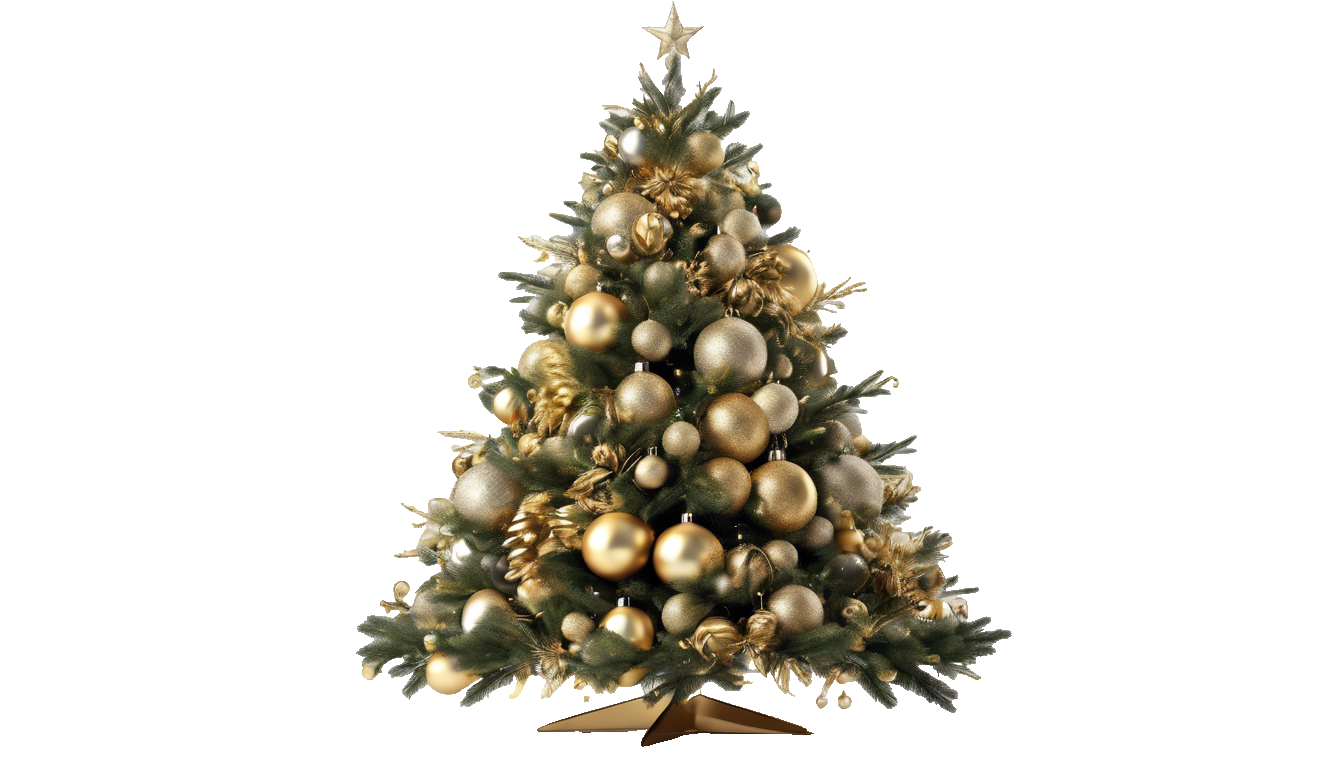

In [9]:
out

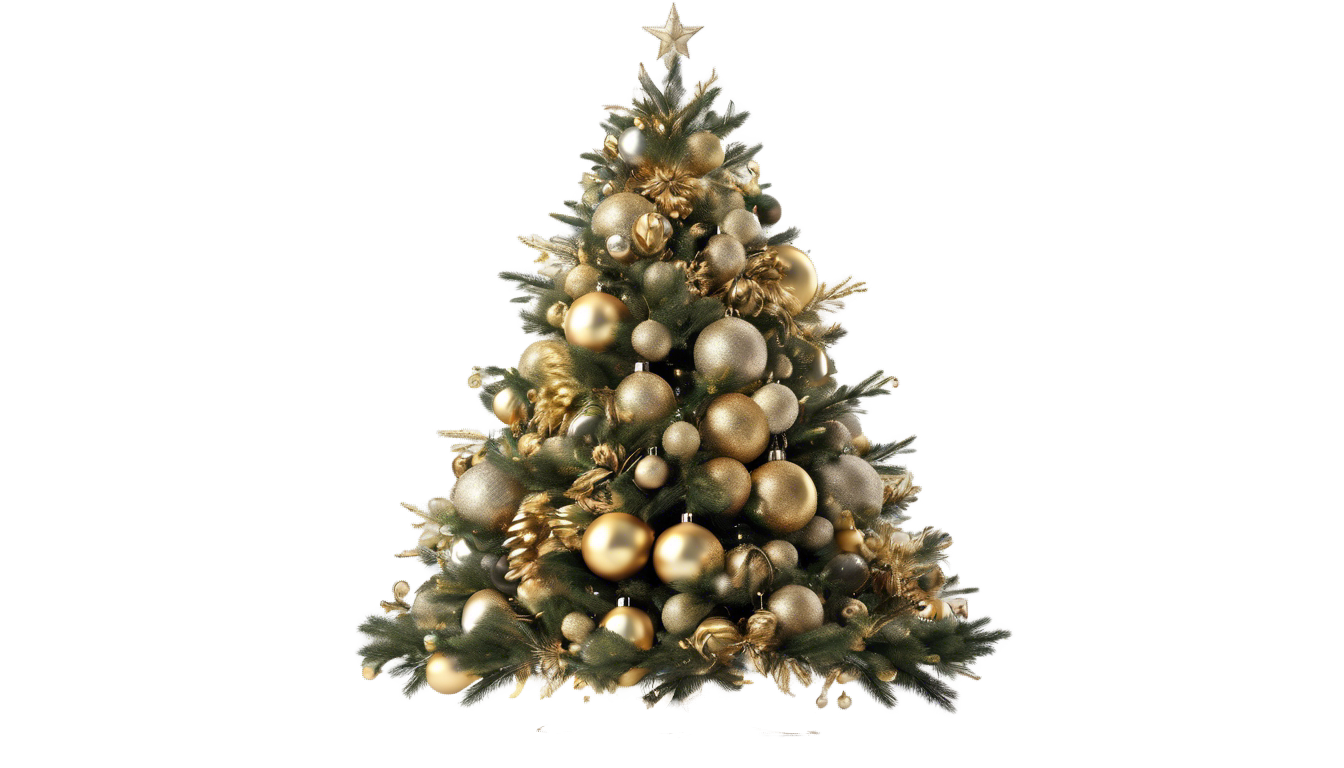

In [10]:
foreground_alpha2